In [1]:
from tensorflow import keras

In [2]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation = "relu"))
model.add(keras.layers.Dense(100,activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


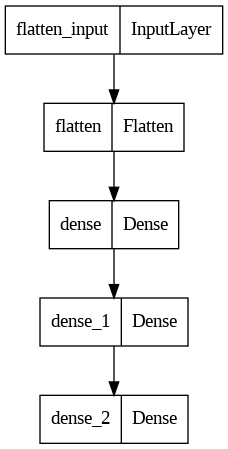

In [4]:
import pydot
keras.utils.plot_model(model)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
dataset = keras.datasets.fashion_mnist
(X_train , y_train) , (X_test , y_test) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd" , metrics = ["accuracy"])

In [11]:
model.history = model.fit(X_train , y_train , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6920 - accuracy: 0.7747
Epoch 2/25
1875/1875 [==============================] - 10s 6ms/step - loss: 0.4748 - accuracy: 0.8354
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4332 - accuracy: 0.8495
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4050 - accuracy: 0.8582
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3845 - accuracy: 0.8655
Epoch 6/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3693 - accuracy: 0.8702
Epoch 7/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3549 - accuracy: 0.8752
Epoch 8/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3437 - accuracy: 0.8780
Epoch 9/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3335 - accuracy: 0.8819
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.32

In [12]:
model.history.params

{'verbose': 1, 'epochs': 25, 'steps': 1875}

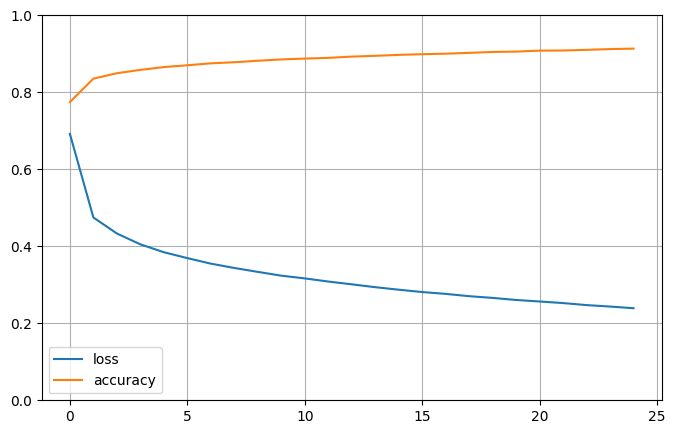

In [14]:
import pandas as pd

pd.DataFrame(model.history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.3415 - accuracy: 0.8741


[0.3415431082248688, 0.8741000294685364]

Here after training for 25 epochs, the model train accuracy is 91.34% and the test accuracy is 87.41%.

In [16]:
model.save("classification_mnist.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [5]:
X_train_cnn = X_train.reshape(60000 , 28,28,1)
X_test_cnn = X_test.reshape(10000 , 28, 28 ,1)

In [8]:
#CNN Model
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 32 , kernel_size = (3,3) ,  strides = 1 , padding = "valid" , activation = "relu" , input_shape = (28,28,1)))
model_b.add(keras.layers.MaxPooling2D((2,2)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300,activation = "relu"))
model_b.add(keras.layers.Dense(100,activation = "relu"))
model_b.add(keras.layers.Dense(10,activation = "softmax"))

In [11]:
model_b.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [12]:
model_b.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd" , metrics = ["accuracy"])

In [14]:
model_b.history = model_b.fit(X_train , y_train , epochs = 25)

Epoch 1/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1449 - accuracy: 0.9479
Epoch 2/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1397 - accuracy: 0.9500
Epoch 3/25
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1332 - accuracy: 0.9525
Epoch 4/25
1875/1875 [==============================] - 51s 27ms/step - loss: 0.1292 - accuracy: 0.9536
Epoch 5/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1221 - accuracy: 0.9556
Epoch 6/25
1875/1875 [==============================] - 50s 27ms/step - loss: 0.1174 - accuracy: 0.9579
Epoch 7/25
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1124 - accuracy: 0.9599
Epoch 8/25
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1067 - accuracy: 0.9621
Epoch 9/25
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1023 - accuracy: 0.9638
Epoch 10/25
1875/1875 [==============================] - 47s 25m

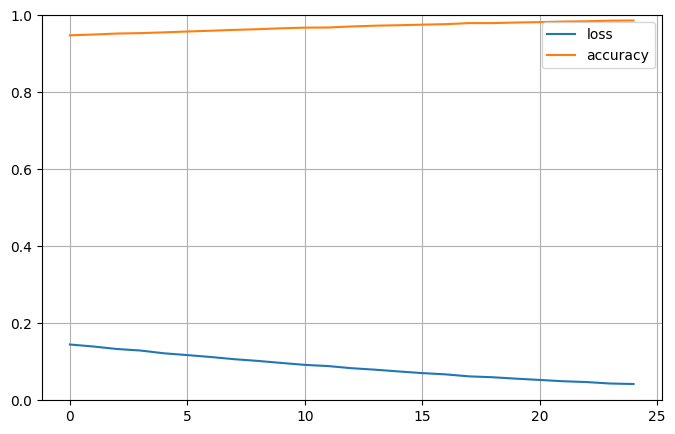

In [16]:
import pandas as pd

pd.DataFrame(model_b.history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()